# Introduction to machine learning & Data Analysis

Basic introduction on how to perform typical machine learning tasks with Python.

Prepared by Mykhailo Vladymyrov & Aris Marcolongo,
Data Science Lab, University Of Bern, 2023

This work is licensed under <a href="https://creativecommons.org/share-your-work/public-domain/cc0/">CC0</a>.

# Part 1.

# What is Machine Learning?

## Why Machine Learning?



1.   
2.   
3.  





## Learning from data

Unlike classical algorithms, created by a human to analyze some data:

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/alg_1.png" width="60%"/>

in machine learning the data itself is used for to define the algorithm:

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/alg_2.png" width="60%"/>


The boundaries are sometimes a bit fuzzy between classical and machine learning algorithm.

In fact when we create algorithms, the problem in hand (namely the data  related to the problem), drives us to choose one or another algorithm. And we then tune it, to perform well on a task in hand.

There are three macro-areas of ML algorithms:

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/alg_4.png" width="60%"/>

In this course we will explore the foundations of the first two macro-areas, the ones most often used in applications.

Recent examples.

1. Hugginface https://github.com/huggingface/transformers and ChatGPT https://chat.openai.com/ from openAI unleashed the power of transformer architectures https://arxiv.org/abs/1706.03762.

2. Segment anything https://github.com/facebookresearch/segment-anything

<img src="https://raw.githubusercontent.com/facebookresearch/segment-anything/main/assets/masks2.jpg" width="40%"/>

3. Mediapipe https://mediapipe-studio.webapps.google.com/home

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/alg_5.png" width="40%"/>

All these applications would have been impossible without using enormous amounts of data.

## Classification vs Regression.

The two main tasks handled by (supervised) ML is regression and classification.
In regression we aim at modeling the relationship between the system's response (dependent variable) and one or more explanatory variables (independent variables).

Examples of regression would be predicting the temperature for each day of the year, or expenses of the household as a function of the number of children and adults.

In classification the aim is to identify what class does a data-point belong to. For example, the species or the iris plant based on the size of its petals, or whether an email is spam or not based on its content.

## Performance measures


1. Regression:
* Mean Square Error: $\textrm{MSE}=\frac{1}{n}\sum_i(y_i - \hat y(x_i))^2$
* Mean Absolute Error: $\textrm{MAE}=\frac{1}{n}\sum_i|y_i - \hat y(x_i)|$
* Median Absolute Deviation: $\textrm{MAD}=\textrm{median}(|y_i - \hat y(x_i)|)$
* Fraction of the explained variance: $R^2=1-\frac{\sum_i(y_i - \hat y(x_i))^2}{\sum_i(y_i - \bar y)^2}$,

where  $\hat y(x_i)$ is the prediction provided by the model for input $x_i$, $y_i$ is the exact value and $\bar y=\frac{1}{n}\sum_i y_i$.

2. Classification:
* Confusion matrix


<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/confusion_mtr.png" width="46%"/>

* Accuracy $=\frac{\textrm{TP} + \textrm{TN}}{\textrm{TP} + \textrm{FP} + \textrm{FN} + \textrm{TN}}$
* Precision $=\frac{\textrm{TP}}{\textrm{TP} + \textrm{FP}}$
* Recall $=\frac{\textrm{TP}}{\textrm{TP} + \textrm{FN}}$
* F1 $=\frac{2}{\frac{1}{\textrm{Precision}} + \frac{1}{\textrm{Recall}} }$
* Threat score (TS), or Intersection over Union: $\mathrm{IoU}=\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}+\mathrm{FP}}$


During model optimization the used measure in most cases must be differentiable. To this end usually some measure of similarities of distributions are employed (e.g. cross-entropy).

## Actual aim: Generalization

In supervised machine learning we distinguish two faces: `training` and `testing`. To measure model performance in an unbiassed way, we need to use different data to test the model than the data that the model was trained on.

When the test set contains information about the training set that can spoil the resulting metrics we talk about `data leakage` or `information leakage`.

Therefore we often use the 'train-test' split: e.g. 20% of all available dataset is reserved for model performance test, and the remaining 80% is used for actual model training (these percentages may vary).

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/Bias_variance_1.png" width="35%"/>

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/Bias_variance_2.png" width="60%"/>

# Load libraries

In [ ]:
# Scikit-learn (formerly scikits.learn and also known as sklearn) is a free
# software machine learning library for the Python programming language.
# It features various classification, regression and clustering algorithms,
# and is designed to interoperate with the Python numerical and scientific
# libraries NumPy and SciPy. (from wiki)

from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import permutation_importance

# common visualization module
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

# numeric library
import numpy as np

import os
import pandas as pd
from time import time as timer
import tarfile

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

In [ ]:
pip install dtreeviz==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 3.4 MB/s eta 0:00:00


In [ ]:
from dtreeviz.trees import dtreeviz # remember to load the package

In [ ]:
if not os.path.exists('data'):
    path = os.path.abspath('.')+'/colab_material.tgz'
    tf.keras.utils.get_file(path, 'https://github.com/neworldemancer/DSF5/raw/master/colab_material.tgz')
    tar = tarfile.open(path, "r:gz")
    tar.extractall()
    tar.close()

261349/261349 [==============================] - 0s 0us/step


# Datasets

In this course we will use several synthetic and real-world datasets to illustrate the behavior of the models and exercise our skills.

## 1. Synthetic linear

In [ ]:
def get_linear(n_d=1, n_points=10, w=None, b=None, sigma=5):
  x = np.random.uniform(0, 10, size=(n_points, n_d))

  w = w or np.random.uniform(0.1, 10, n_d)
  b = b or np.random.uniform(-10, 10)
  y = np.dot(x, w) + b + np.random.normal(0, sigma, size=n_points)

  print('true slopes: w =', w, ';  b =', b)

  return x, y

true slopes: w = [1.67732592] ;  b = 3.269815662075432


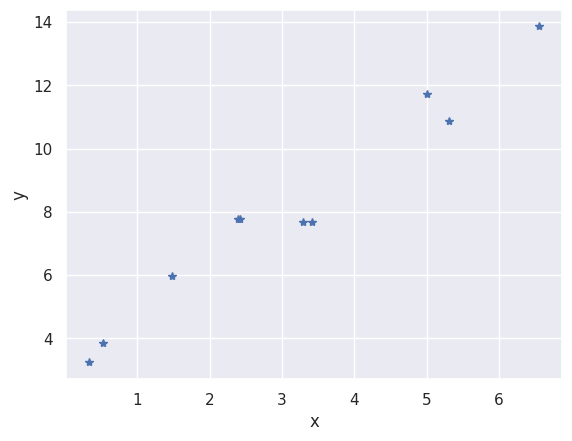

In [ ]:
x, y = get_linear(n_d=1, sigma=1)
plt.plot(x[:, 0], y, '*')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

true slopes: w = [4.29230003 3.29894691] ;  b = 9.794022550432206


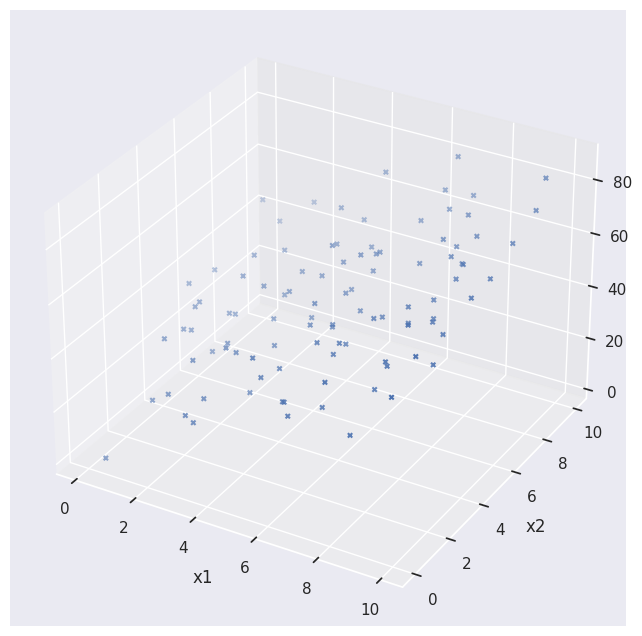

In [ ]:
n_d = 2
x, y = get_linear(n_d=n_d, n_points=100)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y, marker='x', color='b',s=10)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

## 2. House prices

Subset of the Ames Houses dataset: http://jse.amstat.org/v19n3/decock.pdf

In [ ]:
def house_prices_dataset(return_df=False, return_df_xy=False, price_max=400000, area_max=40000):
  path = 'data/AmesHousing.csv'

  df = pd.read_csv(path, na_values=('NaN', ''), keep_default_na=False,  )

  rename_dict = {k:k.replace(' ', '').replace('/', '') for k in df.keys()}
  df.rename(columns=rename_dict, inplace=True)

  useful_fields = ['LotArea',
                  'Utilities', 'OverallQual', 'OverallCond',
                  'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond',
                  'HeatingQC', 'CentralAir', 'Electrical',
                  '1stFlrSF', '2ndFlrSF','GrLivArea',
                  'FullBath', 'HalfBath',
                  'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
                  'Functional','PoolArea',
                  'YrSold', 'MoSold'
                  ]
  target_field = 'SalePrice'

  df.dropna(axis=0, subset=useful_fields+[target_field], inplace=True)

  cleanup_nums = {'Street':      {'Grvl': 0, 'Pave': 1},
                  'LotFrontage': {'NA':0},
                  'Alley':       {'NA':0, 'Grvl': 1, 'Pave': 2},
                  'LotShape':    {'IR3':0, 'IR2': 1, 'IR1': 2, 'Reg':3},
                  'Utilities':   {'ELO':0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3},
                  'LandSlope':   {'Sev':0, 'Mod': 1, 'Gtl': 3},
                  'ExterQual':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'ExterCond':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'BsmtQual':    {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'BsmtCond':    {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'BsmtExposure':{'NA':0, 'No':1, 'Mn': 2, 'Av': 3, 'Gd': 4},
                  'BsmtFinType1':{'NA':0, 'Unf':1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ':5, 'GLQ':6},
                  'BsmtFinType2':{'NA':0, 'Unf':1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ':5, 'GLQ':6},
                  'HeatingQC':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'CentralAir':  {'N':0, 'Y': 1},
                  'Electrical':  {'':0, 'NA':0, 'Mix':1, 'FuseP':2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},
                  'KitchenQual': {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'Functional':  {'Sal':0, 'Sev':1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2':5, 'Min1':6, 'Typ':7},
                  'FireplaceQu': {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'PoolQC':      {'NA':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'Fence':       {'NA':0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv':4},
                  }

  df_X = df[useful_fields].copy()
  df_X.replace(cleanup_nums, inplace=True)  # convert continous categorial variables to numerical
  df_Y = df[target_field].copy()

  x = df_X.to_numpy().astype(np.float32)
  y = df_Y.to_numpy().astype(np.float32)

  if price_max>0:
    idxs = y<price_max
    x = x[idxs]
    y = y[idxs]

  if area_max>0:
    idxs = x[:,0]<area_max
    x = x[idxs]
    y = y[idxs]

  return (x, y, df) if return_df else ((x, y, (df_X, df_Y)) if return_df_xy else (x,y))

In [ ]:
x, y, df = house_prices_dataset(return_df=True)
print(x.shape, y.shape)
df.head()

(2847, 24) (2847,)


,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NA,IR1,Lvl,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NA,IR1,Lvl,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900


In [ ]:
df.describe()

,Order,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2929.000000,2.929000e+03,2929.000000,2439.000000,2929.00000,2929.000000,2929.000000,2929.000000,2929.000000,2906.000000,...,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000
mean,1465.461591,7.143956e+08,57.379652,69.223042,10148.06282,6.095254,5.563332,1971.344486,1984.258791,101.931865,...,93.749744,47.549676,23.019461,2.593377,16.007511,2.244111,50.652441,6.216456,2007.790372,180800.599522
std,846.104363,1.887262e+08,42.643257,23.370001,7881.35958,1.411122,1.111678,30.243747,20.859616,179.133457,...,126.383085,67.489204,64.148601,25.145578,56.096167,35.603235,566.440219,2.714863,1.316832,79899.955086
min,1.000000,5.263011e+08,20.000000,21.000000,1300.00000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.000000,5.284770e+08,20.000000,58.000000,7440.00000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.000000,5.354532e+08,50.000000,68.000000,9434.00000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2198.000000,9.071811e+08,70.000000,80.000000,11556.00000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.00000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


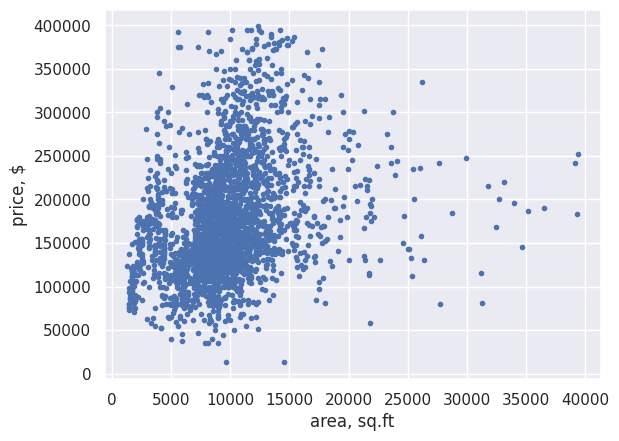

In [ ]:
plt.plot(x[:, 0], y, '.')
plt.xlabel('area, sq.ft')
plt.ylabel('price, $');
plt.show()

## 3. Blobs

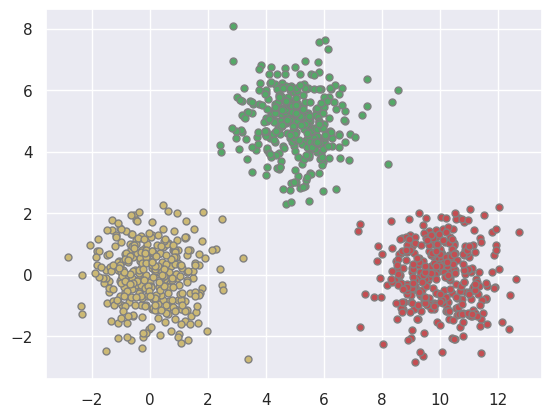

In [ ]:
x, y = make_blobs(n_samples=1000, centers=[[0,0], [5,5], [10, 0]])
colors = "ygr"
for i, color in enumerate(colors):
    idx = y == i
    plt.scatter(x[idx, 0], x[idx, 1], c=color, edgecolor='gray', s=25)
plt.show()

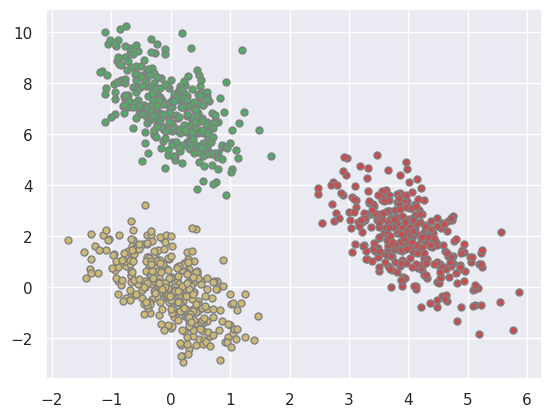

In [ ]:
x, y = make_blobs(n_samples=1000, centers=[[0,0], [5,5], [10, 0]])

transformation = [[0.4, 0.2], [-0.4, 1.2]]  # affine transformation matrix
x = np.dot(x, transformation)               # applied to point coordinated to make blobs less separable

colors = "ygr"
for i, color in enumerate(colors):
    idx = y == i
    plt.scatter(x[idx, 0], x[idx, 1], c=color, edgecolor='gray', s=25)
plt.show()



## 4. MNIST

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting (taken from http://yann.lecun.com/exdb/mnist/). Each example is a 28x28 grayscale image and the dataset can be readily downloaded from Tensorflow.

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Let's check few samples:

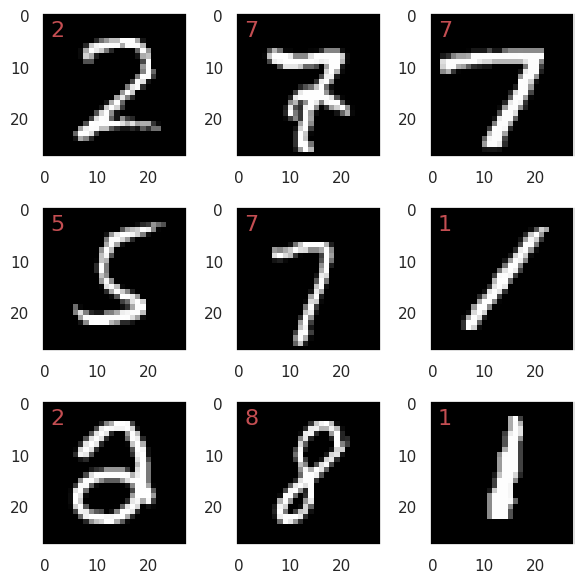

In [ ]:
n = 3
fig, ax = plt.subplots(n, n, figsize=(2*n, 2*n))
ax = [ax_xy for ax_y in ax for ax_xy in ax_y]
for axi, im_idx in zip(ax, np.random.choice(len(train_images), n**2)):
  im = train_images[im_idx]
  im_class = train_labels[im_idx]
  axi.imshow(im, cmap='gray')
  axi.text(1, 4, f'{im_class}', color='r', size=16)
  axi.grid(False)
plt.tight_layout()
plt.show()

## 5. Fashion MNIST

`Fashion-MNIST` is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. (from https://github.com/zalandoresearch/fashion-mnist)

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Let's check few samples:

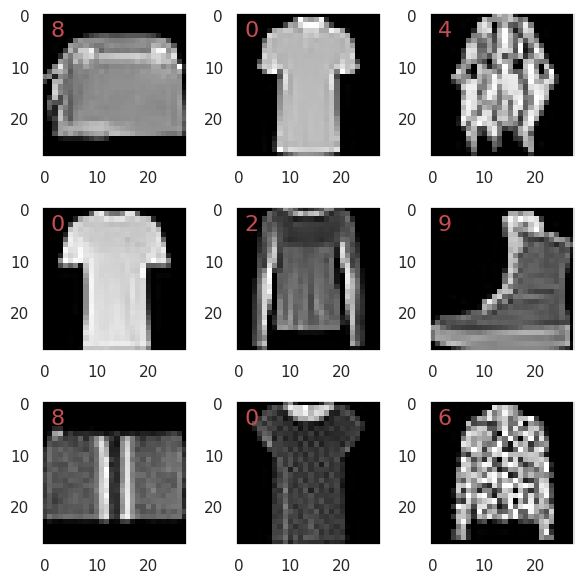

In [ ]:
n = 3
fig, ax = plt.subplots(n, n, figsize=(2*n, 2*n))
ax = [ax_xy for ax_y in ax for ax_xy in ax_y]
for axi, im_idx in zip(ax, np.random.choice(len(train_images), n**2)):
  im = train_images[im_idx]
  im_class = train_labels[im_idx]
  axi.imshow(im, cmap='gray')
  axi.text(1, 4, f'{im_class}', color='r', size=16)
  axi.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
fmnist_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Each of the training and test examples is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

# `scikit-learn` interface

In this course we will primarily use the `scikit-learn` module.
You can find extensive documentation with examples in the [user guide](https://scikit-learn.org/stable/user_guide.html)

The module contains A LOT of different machine learning methods, and here we will cover only few of them. What is great about `scikit-learn` is that it has a uniform and consistent interface.

All the different ML approaches are implemented as classes with a set of same main methods:

1. `fitter = ...`: Create fitter object.
2. `fitter.fit(x, y[, sample_weight])`: Fit model to predict from list of smaples `x` a list of target values `y`.
3. `y_pred = fitter.predict(X)`: Predict using the trained model.
4. `s = fitter.score(x, y[, sample_weight])`: Obtain a relevant performance measure of the trained model.

This allows one to easily replace one approach with another and find the best one for the problem at hand, by simply using a regression/classification object of another class, while the rest of the code can remain the same.


It is useful to know that generally in scikit-learn the input data is represented as a matrix $X$ of dimensions `n_samples x n_features` (also called the `design matrix`), whereas the supervised labels/values are stored in a matrix $Y$ of dimensions `n_samples x n_target` .

# 1.Linear models

In many cases the scalar value of interest - dependent variable - is (or can be approximated as) linear combination of the independent variables.

In linear regression the estimator is searched in the form: $$\hat{y}(\bar{x} | w_0,\bar{w}) = w_0 + w_1 x_1 + ... + w_p x_p$$

The parameters $\bar{w} = (w_1,..., w_p)$ and $w_0$ are designated as `coef_` and `intercept_` in `sklearn`.

Reference: https://scikit-learn.org/stable/modules/linear_model.html

## 1. Linear regression

[LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) fits a linear model with coefficients $\bar{w} = (w_1,..., w_p)$ and $w_0$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

Mathematically it solves a problem of the form:  $$(w^{opt}_0,\bar{w}^{opt}) = \arg min_{w_0,\bar{w}} \sum_i \left(\hat{y}(\bar{x_i} | w_0,\bar{w})-y_i\right)^2$$

The function:

$$L(w,\bar{w}) \equiv \sum_i \left(\hat{y}(\bar{x_i} | w_0,\bar{w})-y_i\right)^2$$

is called the `loss function` for linear regression and we say that during training/fitting the loss function is `minimized`.

In terms of the design matrix $X_{i,p}$, where $i$ ranges over the number of samples and $p$ across the number of features:

$$L(w,\bar{w})=\sum_i \left((w_0 + \sum_p X_{i,p}w_p)-y_i\right)^2$$

This makes it explicit that the function to minimize is quadratic in $w$ and an analytical solution is therefore available (no numerical optimization).

true slopes: w = [4.80689432] ;  b = -2.664380334645598


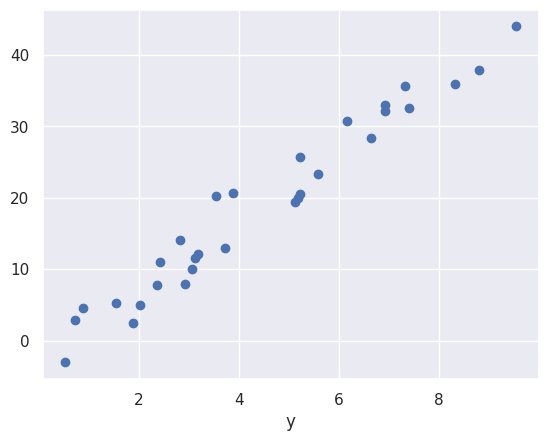

In [ ]:
x, y = get_linear(n_d=1, sigma=3, n_points=30)  # p==1, 1D input
plt.scatter(x, y);
plt.xlabel('x')
plt.xlabel('y')
plt.show()

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression()

In [ ]:
w, w0 = reg.coef_, reg.intercept_
print(w, w0)

[4.87630393] -2.821866205200841


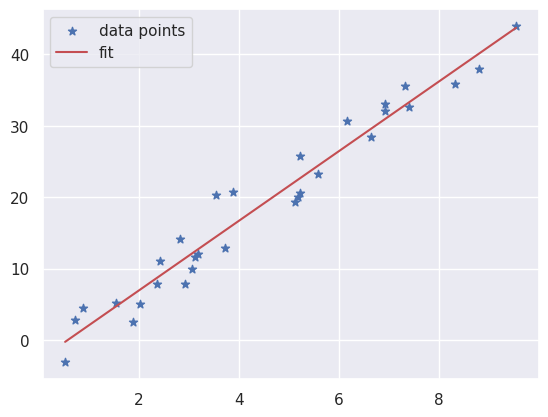

In [ ]:
plt.scatter(x, y, marker='*', label='data points')
x_f = np.linspace(x.min(), x.max(), 10)
y_f = w0 + w[0] * x_f
plt.plot(x_f, y_f, label='fit', c='r')
plt.legend()
plt.show()

In [ ]:
# mse
np.std(y - reg.predict(x))  # or use metrics.mean_squared_error(..., squared=False)

2.566035410254514

In [ ]:
# R2
reg.score(x, y)

0.9566238442038738

Let's try 2D input.
Additionally, here we will split the whole dataset into training and test subsets using the `train_test_split` function:

true slopes: w = [8.88475487 6.22976564] ;  b = 5.390214677140332


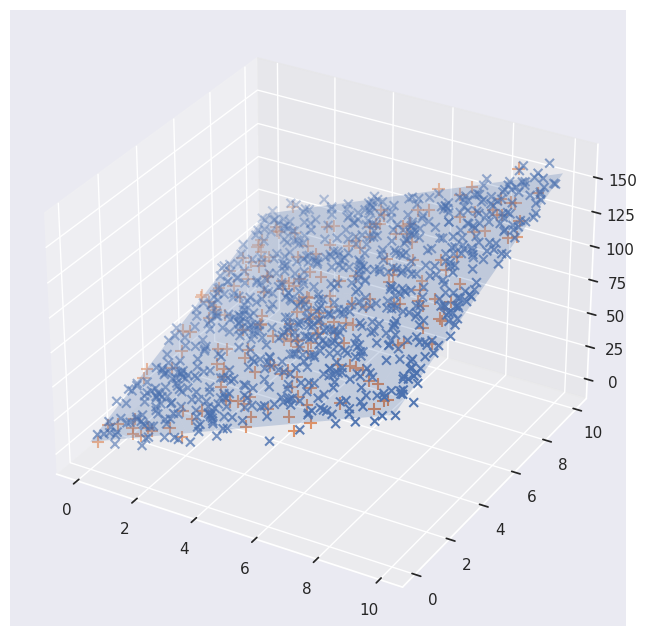

In [ ]:
n_d = 2
x, y = get_linear(n_d=n_d, n_points=1000, sigma=5)

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train, marker='x', s=40)
ax.scatter(x_test[:,0], x_test[:,1], y_test, marker='+', s=80)

xx0 = np.linspace(x[:,0].min(), x[:,0].max(), 10)
xx1 = np.linspace(x[:,1].min(), x[:,1].max(), 10)
xx0, xx1 = [a.flatten() for a in np.meshgrid(xx0, xx1)]
xx = np.stack((xx0, xx1), axis=-1)
yy = reg.predict(xx)
ax.plot_trisurf(xx0, xx1, yy, alpha=0.25, linewidth=0)
plt.show()

In [ ]:
# mse
print('train mse =', np.std(y_train - reg.predict(x_train)))
print('test mse =', np.std(y_test - reg.predict(x_test)))

train mse = 4.737072198687886
test mse = 5.0878138568991895


In [ ]:
# R2
print('train R2 =', reg.score(x_train, y_train))
print('test R2 =', reg.score(x_test, y_test))

train R2 = 0.9789650976232964
test R2 = 0.9721150799452483


## EXERCISE 1.

Use linear regression to fit house prices dataset.

In [ ]:
# 1. make train/test split

# 2. fit the model

# 3. evaluate MSE, MAD, and R2 on train and test datasets

# 4. plot y vs predicted y for test and train parts

## 2. Logistic regression

***-binary case***

Logistic regression, despite its name, is a linear model for classification rather than regression. Examples of binary output can be \{sold, not sold \} when predicting whether a product will be sold or not, or \{failed, passed\} to predict the probability of a student of failing a class. It is custom to map the mutually exclusive classes to targets $y_i \in \{0,1\}$, called the positive and negative class respectively.

In binary logistic regression the probability $p$ of a point belonging to the positive is modelled as: $$p =\sigma (w_0 + w_1 x_1 + ... + w_p x_p)$$, where the sigmoid function is defined as:

$$\sigma(x)=\frac{1}{1+e^{-x}} $$

The sigmoid function maps the real numbers output of a generic linear function to [0,1].

The parameters $w$ are in this case trained to minimize the following loss function:

$$L(w_0,\bar{w})=-\sum_i y_i \log(p_i)$$

***-more classes***

We have a `multiclass` model when each sample must belong to one of several mutually exclusive classes, e.g. to predict the reaction to a treatment between the classes \{negative, not significant, positive \}.

We introduce the one-hot representation of the output $y_i^{OH}(c)=1$ if sample $i$ belongs to class $c$ and $0$ otherwise. This generates from a multiclass label like $y_i \in \{cat, dog, other\}$ three binary labels: $y_i^{\text{OH}}(\text{dog}),y_i^{\text{OH}}(\text{cat}),y_i^{\text{OH}}(\text{other})  \in \{0,1\}$.

Two options are available for solving multiclass problems.

* One-versus-rest (`ovr`) performs several independent fits of binary logistic regressions models, one for each class $c$:
$$p'_c =\sigma (w_{c,0} + w_{c,1} x_1 + ... + w_{c,p} x_{p})$$
minimizing the binary loss function for each class separately:

$$L_c(w_0,\bar{w})=-\sum_i y_i^{\text{OH}}(c) \log(p'_{i,c})$$

Note that if $y_i^{\text{OH}}(c)=0$ than sample i must belong to one of the other classes (hence the name).

Since each model is trained independently the probabilitities $p'_c$ do not need to sum to one. This constrained (if needed) is often imposed a-posteriori:
$$p_c = \frac{p'_{c}}{\sum_{c'}{p'_{c'}}}$$

* The multinomial (`multinomial`) logistic regression evaluates the so-called logits and then aggregates them using the softmax operator:

$$\text{logits}_{c}=w_{c,0} + w_{c,1} x_1 + ... + w_{c,p} x_{p}$$
$$p_c = \text{softmax}(\text{logits})_c=\frac{e^{\text{logits}_c}}{\sum_{c'} e^{\text{logits}_{c'}}}$$

Note that the probabilities returned by the models are already normalized before training. All the parameters are then trained simultaneously and minimize the loss function:

$$L(\{w_{0,c}\},\{\bar w_{c}\} )=-\sum_i \left(\sum_c y_i^{OH}(c)\log p_{i,c}\right)$$

NOTE 1: the choices done here may seem ad-hoc. They are the result of several efforts in data-analysis research. E.g. the loss function has its derivation into probability theory and the maximum likelyhood framework.

NOTE 2: if we have a problem with multiple classes but not exclusive, this is called a `multilabel` setting. This can be tackled by logistic regression fitting individual binary models.

In [ ]:
# routine for coloring 2d space according to class prediction

def plot_prediction_2d(x_min, x_max, y_min, y_max, classifier, ax=None):
  """
  Creates 2D mesh, predicts class for each point on the mesh, and visualises it
  """

  mesh_step = .02  # step size in the mesh
  x_coords = np.arange(x_min, x_max, mesh_step) # coordinates of mesh colums
  y_coords = np.arange(y_min, y_max, mesh_step) # coordinates of mesh rows

  # create mesh, and get x and y coordinates of each point point
  # arrenged as array of shape (n_mesh_rows, n_mesh_cols)
  mesh_nodes_x, mesh_nodes_y = np.meshgrid(x_coords, y_coords)

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].

  # prepare xy pairs for prediction: matrix of size (n_mesh_rows*n_mesh_cols, 2)
  mesh_xy_coords = np.stack([mesh_nodes_x.flatten(),
                             mesh_nodes_y.flatten()], axis=-1)

  # obtain class for each node
  mesh_nodes_class = classifier.predict(mesh_xy_coords)


  # reshape to the shape (n_mesh_rows, n_mesh_cols)==mesh_nodes_x.shape for visualization
  mesh_nodes_class = mesh_nodes_class.reshape(mesh_nodes_x.shape)

  # Put the result into a color countour plot
  ax = ax or plt.gca()
  ax.contourf(mesh_nodes_x,
              mesh_nodes_y,
              mesh_nodes_class,
              cmap='Pastel1', alpha=0.5)

training accuracy : 0.995 (multinomial)


<ipython-input-7-3f9f3a1c2e99>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_0[idx], x_1[idx], c=color, cmap=plt.cm.Paired,


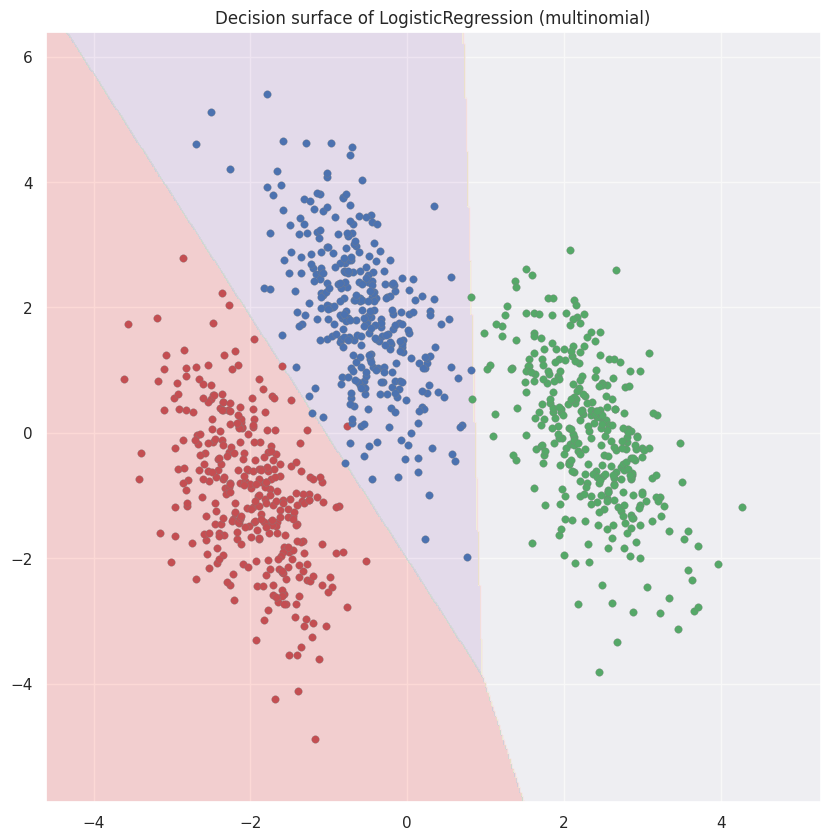

training accuracy : 0.976 (ovr)


<ipython-input-7-3f9f3a1c2e99>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_0[idx], x_1[idx], c=color, cmap=plt.cm.Paired,


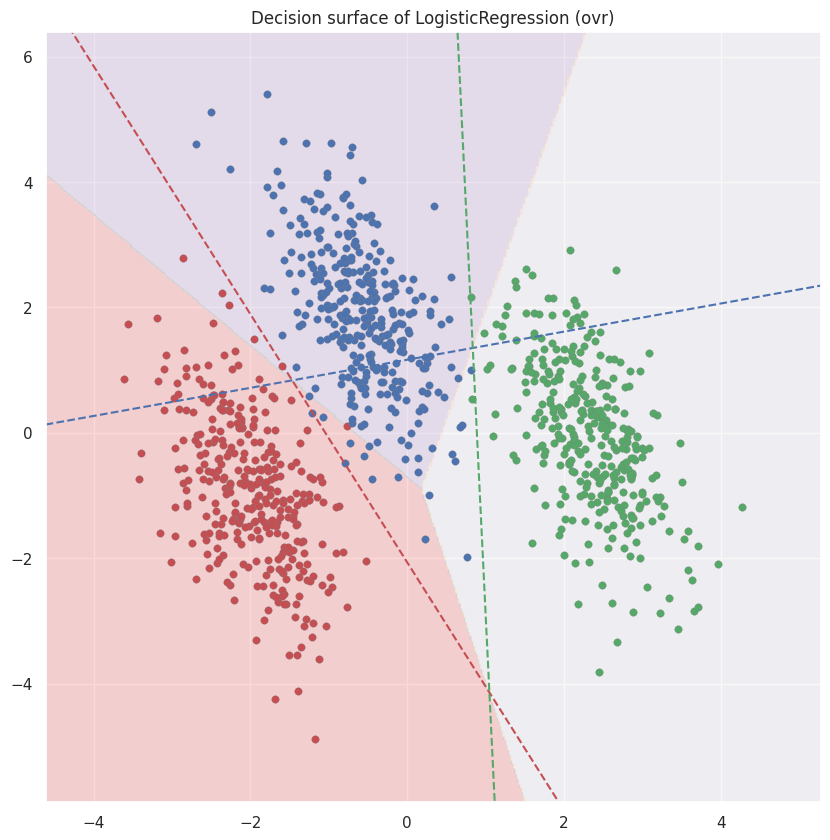

In [ ]:
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
x, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
x = np.dot(x, transformation)

for multi_class in ('multinomial', 'ovr'):
    # do fit
    clf = linear_model.LogisticRegression(solver='sag', max_iter=100,
                             multi_class=multi_class, )
    clf.fit(x, y)

    # print the training scores
    print("training accuracy : %.3f (%s)" % (clf.score(x, y), multi_class))

    # get range for visualization
    x_0 = x[:, 0]
    x_1 = x[:, 1]
    x_min = x_0.min() - 1
    x_max = x_0.max() + 1
    y_min = x_1.min() - 1
    y_max = x_1.max() + 1

    plt.figure(figsize=(10,10))
    plot_prediction_2d(x_min, x_max, y_min, y_max, classifier=clf)

    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = 'rbg'

    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(x_0[idx], x_1[idx], c=color, cmap=plt.cm.Paired,
                    edgecolor='gray', s=30, linewidth=0.2)

    # Plot the three one-against-all classifiers
    if multi_class=='ovr':
        coef = clf.coef_
        intercept = clf.intercept_
        def plot_hyperplane(c, color):
            def line(x0):
                return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
            plt.plot([x_min, x_max], [line(x_min), line(x_max)],
                    ls="--", color=color)
        for i, color in zip(clf.classes_, colors):
            plot_hyperplane(i, color)

    plt.show()



## EXERCISE 2.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

We will reshape 2-d images to 1-d arrays for use in scikit-learn:

In [ ]:
n_train = len(train_labels)
x_train = train_images.reshape((n_train, -1))
y_train = train_labels

n_test = len(test_labels)
x_test = test_images.reshape((n_test, -1))
y_test = test_labels

Now use a multinomial logistic regression classifier, and measure the accuracy:

In [ ]:
# 1. Create classifier
clf = linear_model.LogisticRegression(solver='sag', max_iter=10,
                             multi_class='multinomial', )

# 2. fit the model
clf.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=10, multi_class='multinomial', solver='sag')

training accuracy : 0.868 (multinomial)
test accuracy : 0.840 (multinomial)
Check that you get the same accuracy from the score method: 0.8404


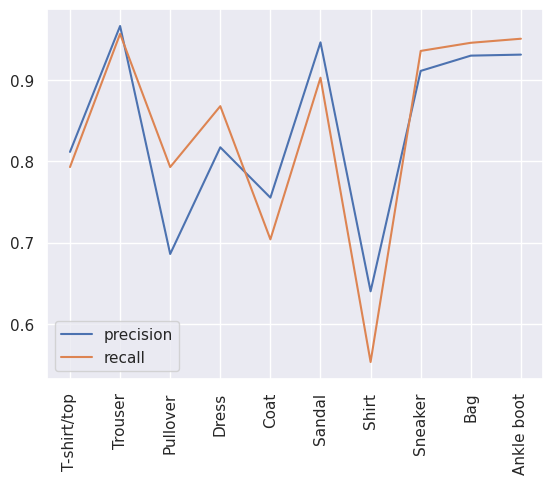

[[793   8  17  53   7   0 110   0  12   0]
 [  3 957   4  28   3   0   3   0   2   0]
 [ 19   5 793  12  93   1  65   0  12   0]
 [ 23  16  21 868  31   0  35   0   6   0]
 [  0   1 160  44 704   1  80   0  10   0]
 [  0   1   0   0   0 903   0  49   7  40]
 [134   1 153  46  91   0 553   0  22   0]
 [  0   0   0   0   0  34   0 936   0  30]
 [  5   1   8  11   3   3  17   6 946   0]
 [  0   0   0   0   0  12   1  36   0 951]]


In [ ]:
# 3. evaluate accuracy on train and test datasets. Use for this the reg.score
print("training accuracy : %.3f (%s)" % (clf.score(x_train, y_train), 'multinomial'))
print("test accuracy : %.3f (%s)" % (clf.score(x_test, y_test), 'multinomial'))
# 4. evaluate the confusion matrix on the test set using, from sklearn import metrics the metrics.confusion_matrix method (check documentation)
y_p_test = clf.predict(x_test)

from sklearn import metrics
cm=metrics.confusion_matrix( y_test, y_p_test )
# 5. inspect the confusion metrics and compute using matrix manipulations the precision and recall for each category
print(f'Check that you get the same accuracy from the score method: {np.sum([cm[i,i] for i in range(10)])/np.sum(cm)}')

precisions=[]
recalls=[]
#precision
for i in range(10):
    precisions.append(cm[i,i]/np.sum(cm[:,i]))

#recall
for i in range(10):
    recalls.append(cm[i,i]/np.sum(cm[i,:]))

plt.plot(fmnist_class_names,precisions, label='precision')
plt.plot(fmnist_class_names,recalls, label='recall')
plt.xticks(rotation=90)
plt.legend()

plt.show()

print(cm)


# 2. Trees & Forests

## 1. Decision Tree

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning **simple** decision rules inferred from the data features.

They are fast to train, easily interpretable, capture non-linear dependencies, and require small amount of data.

We will see that creation trees create a partition of the feature space $X$ into subregions $R_i,i=1..N_r$, this partition being described by a tree structure. Predictions will be made with the following procedure. Given a new test point $x$:

1. Assign $x$ to the region it belongs, e.g. $R_k$
2. For classification, make a majiority vote using the training points belonging to $R_k$. For regression, evaluate the mean of the target over all training points belonging to $R_k$.


In [ ]:
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)
dtcs = []
for depth in (1, 2, 3, 4):
    # do fit
    dtc = tree.DecisionTreeClassifier(max_depth=depth, criterion='gini')  # 'entropy'
    dtcs.append(dtc)
    dtc.fit(X, y)

    # print the training scores
    print("training score : %.3f (depth=%d)" % (dtc.score(X, y), depth))

    # get range for visualization
    x_0 = X[:, 0]
    x_1 = X[:, 1]
    x_min = x_0.min() - 1
    x_max = x_0.max() + 1
    y_min = x_1.min() - 1
    y_max = x_1.max() + 1

    fig, ax = plt.subplots(1, 2,  figsize=(14,7), dpi=300)
    plot_prediction_2d(x_min, x_max, y_min, y_max, classifier=dtc, ax=ax[0])

    ax[0].set_title("Decision surface of DTC (%d)" % depth)

    # Plot also the training points
    colors = "rbg"
    for i, color in zip(dtc.classes_, colors):
        idx = np.where(y == i)
        ax[0].scatter(x_0[idx], x_1[idx], c=color,
                    edgecolor='black', s=20, linewidth=0.2)

    with plt.style.context('classic'):
      tree.plot_tree(dtc, ax=ax[1]);

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

But how is the tree constructed? We distinguish here classification and regression:

***-classification***

Given any sample $S$ of points in feature space $x_i,i=1...N$, assigned to classes $c_i,i=1..N, c_i \in {1,..,N_c}$, we can evaluate the proportions $p_c=\frac{N_c}{N}$ where $N_c$ is the number of points belonging to class $c$.

* the Gini index is defined as:
$$G(S) = 1 - \sum_c {p_c^2}, $$

* the Entropy is:
$$E(S) =  - \sum_c {p_c \times log(p_c)}, $$

These are defined `impurity measures`.

/both are scores fore purity of a region (how many points are wrongly classified in each node of the tree)


The optimization is performed in a greedy manner, one split at a time. First a coordinate is chosen and a cutoff $a$. Points $i$ such that $x_{i,k}<a$ go to the left child node, points If $x_{i,k} \ge a$ go to the right child node. We define $S_{<}$, $S_{>}$ as the set of points belonging to the left/right child and $N_{<}$ and $N_{>}$ the corresponding number of points. The information gain of the split is defined as:

$$ IG = E(S) - \frac{N_{<}}{N} \times E(S_{<}) - \frac{N_{>}}{N} \times E(S_{>})$$

Same exepression holds for the Gini index. At each stage the split with the higher information gain is preferred. This favors that the most relevant features are used on the top of the tree and truncating/pruning a tree reduces overfitting.

***-regression***

The regression framework has a lot in common with classification but we start with sample $S$ of points in feature space $x_i,i=1...N$ and their targets $y_i,y_i \in \mathbf{R}$. Instead of the impurity measures we use the sample variance as a criterion:

$$V(S)=\frac{1}{N} \sum_i (y_i - \bar y)^2$$

Note that in the regression case we have a simplication of prefactors. If we call $y_<$ the mean of the left points and $y_>$ the mean of the right points the role of the information gain here is taken by:

$$\frac{N_{<}}{N} \times V(S_{<}) + \frac{N_{>}}{N} \times V(S_{>})=\frac{1}{N}\left(\sum_{i \in S_<} (y_i-y_<)^2+\sum_{i \in S_>} (y_i-y_>)^2\right)$$

So the information gain is replaced by the `reduction in variance` after predicting a different mean for the points belonging to the left and right children.

These are also known as the CART (classification and regression trees) splitting criteria.


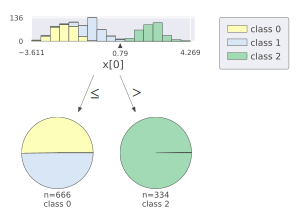

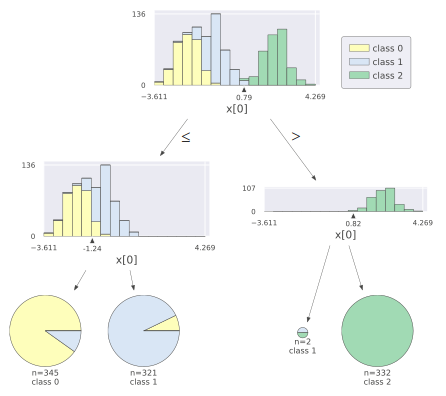

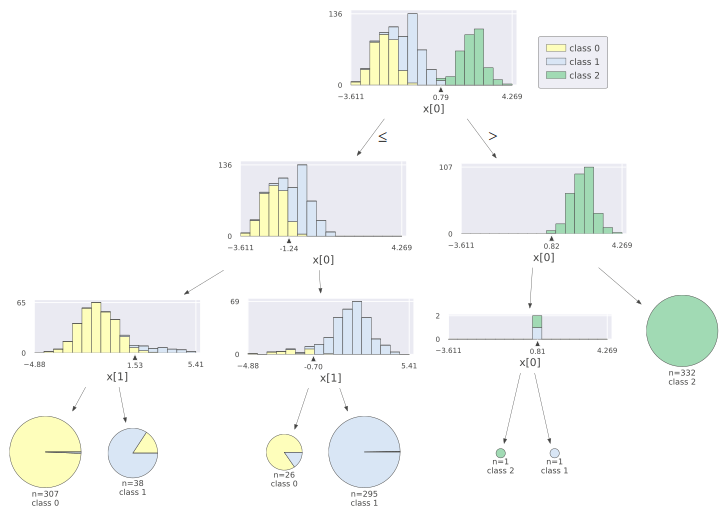

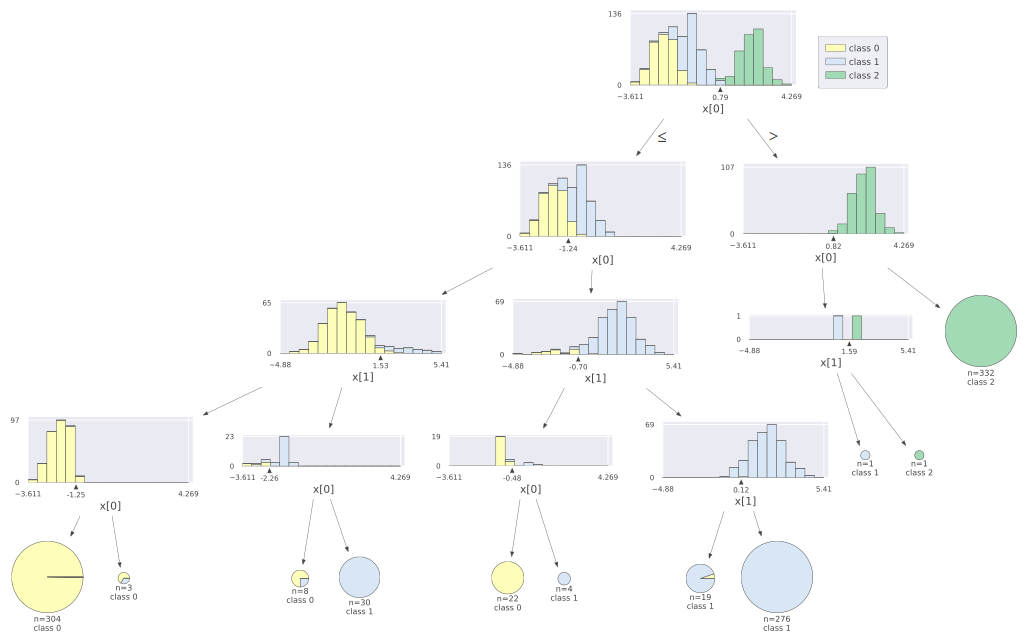

In [ ]:
import logging
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

for i, dtc in enumerate(dtcs):
  viz = dtreeviz(dtc, X, y, feature_names=['x[0]', 'x[1]'])
  viz.scale=1.2
  display(viz)


Additionally we can directly inspect relevance of the input features for the classification:

(0.0, 1.0)

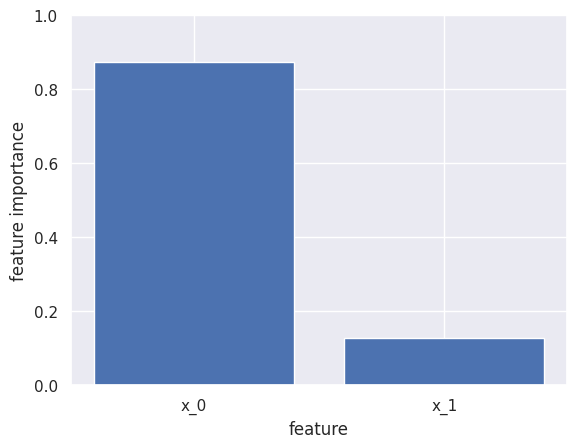

In [ ]:
plt.bar(['x_0','x_1'], dtcs[2].feature_importances_)
plt.xlabel('feature')
plt.ylabel('feature importance')
plt.ylim(0, 1)

## 2. Random Forest

The `sklearn.ensemble` provides several ensemble algorithms. RandomForest is an averaging algorithm based on randomized decision trees. This means a diverse set of classifiers is created by introducing randomness in the classifier construction.

The prediction of the ensemble is given as the averaged prediction of the individual classifiers (regression) or by majority voting (classification). E.g. for regression:

$$ RF(x) = \frac{1}{N_\text{trees}}\sum_{i=1}^{N_\text{trees}} Tree_i(x)$$

Individual decision trees typically exhibit high variance and tend to overfit.
In random forests:
* each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.
* when splitting each node during the construction of a tree, the best split is found from a random subset of features, according to `max_features` parameter.

The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant, hence yielding an overall better model.


training score : 0.789 (n_est=1)


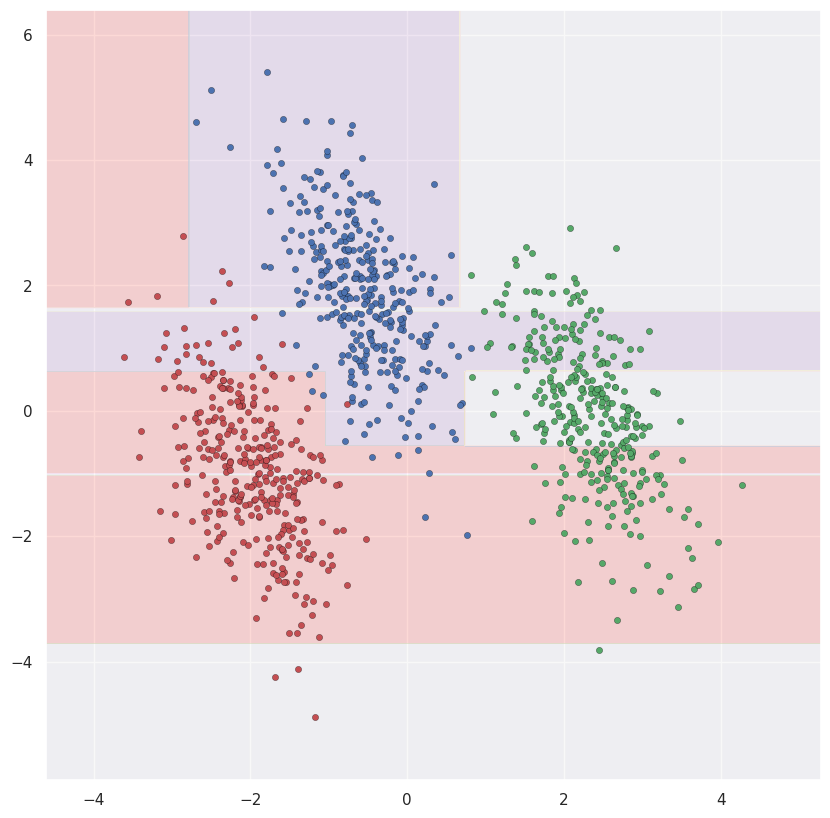

training score : 0.931 (n_est=4)


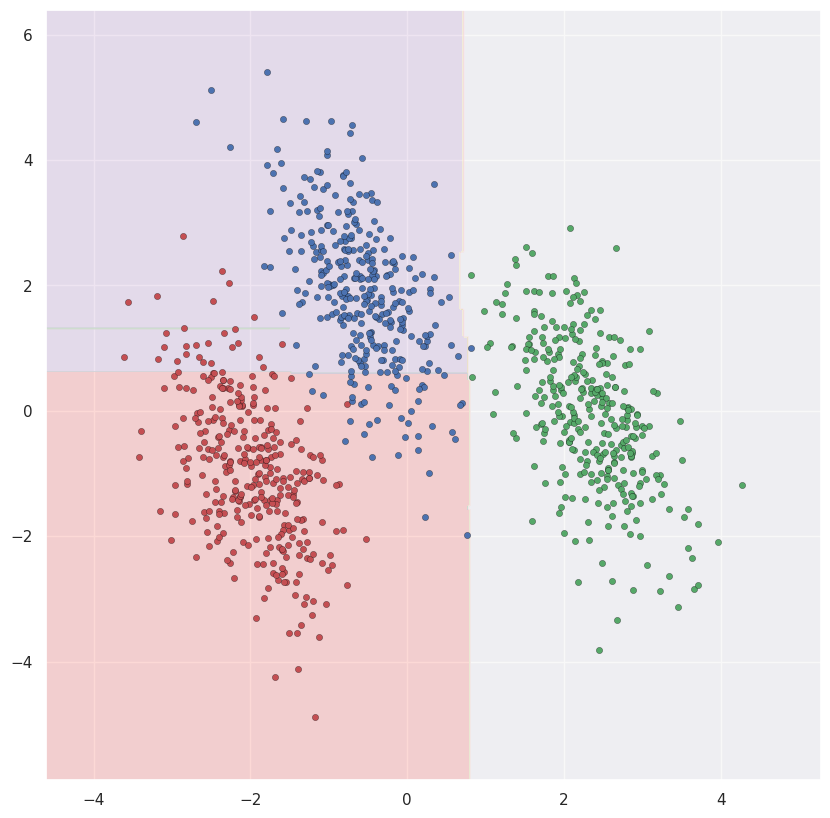

training score : 0.995 (n_est=50)


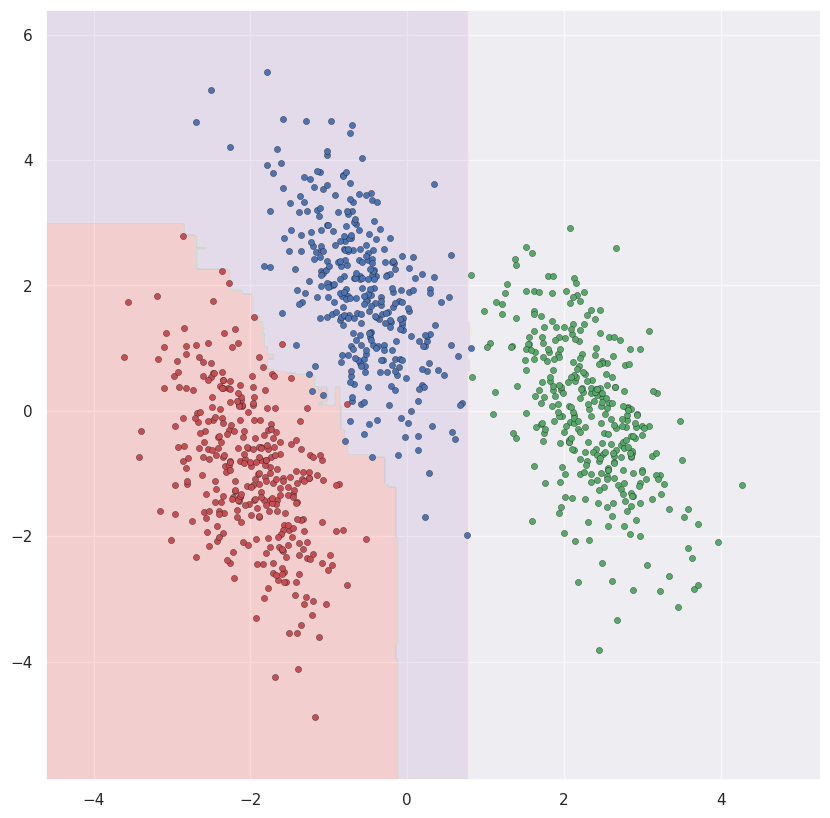

In [ ]:
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for n_est in (1, 4, 50): #how many estimators --> how many trees will we do?
    # do fit
    rfc = ensemble.RandomForestClassifier(max_depth=4, n_estimators=n_est,) #how many trees should we fit?
    rfc.fit(X, y)

    # print the training scores
    print("training score : %.3f (n_est=%d)" % (rfc.score(X, y), n_est))

    # get range for visualization
    x_0 = X[:, 0]
    x_1 = X[:, 1]
    x_min = x_0.min() - 1
    x_max = x_0.max() + 1
    y_min = x_1.min() - 1
    y_max = x_1.max() + 1

    plt.figure(figsize=(10,10))
    plot_prediction_2d(x_min, x_max, y_min, y_max, classifier=rfc)

    # Plot also the training points
    colors = 'rbg'
    for i, color in enumerate(colors):
        idx = np.where(y == i)
        plt.scatter(x_0[idx], x_1[idx], c=color,
                    edgecolor='black', s=20, linewidth=0.2)


    plt.show()

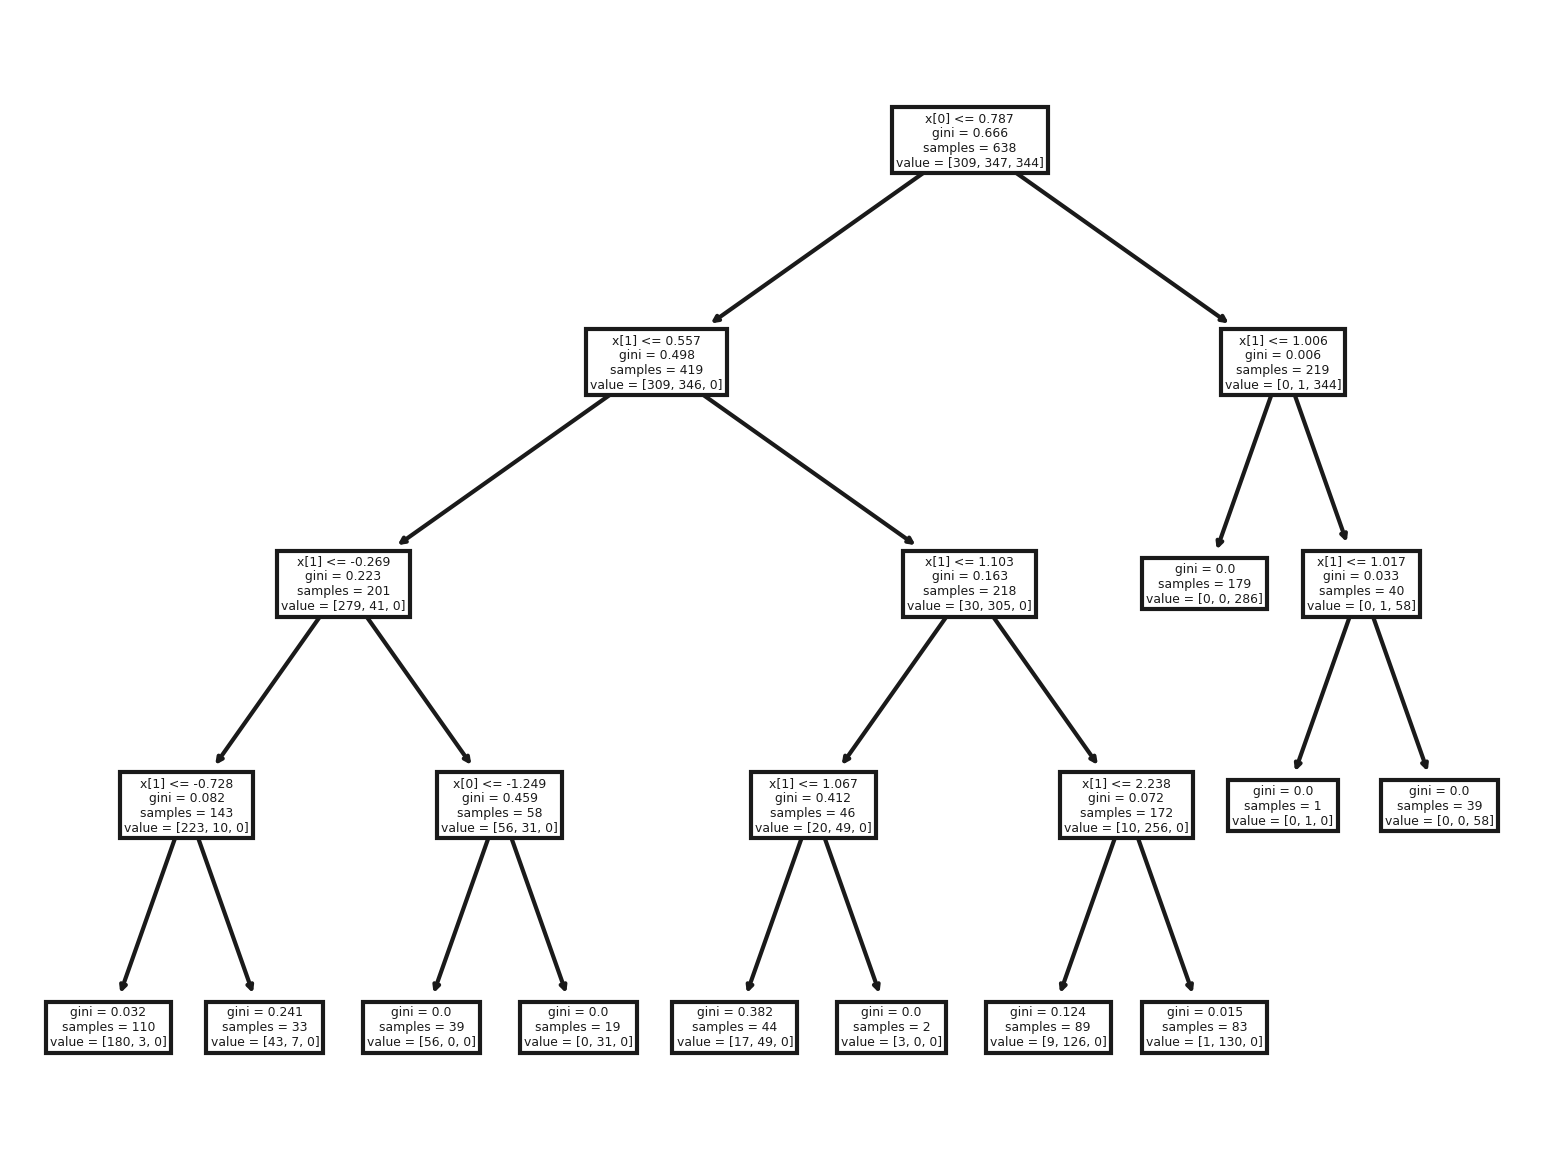

In [ ]:
plt.figure(dpi=300)
with plt.style.context('classic'):
  tree.plot_tree(rfc.estimators_[20]);

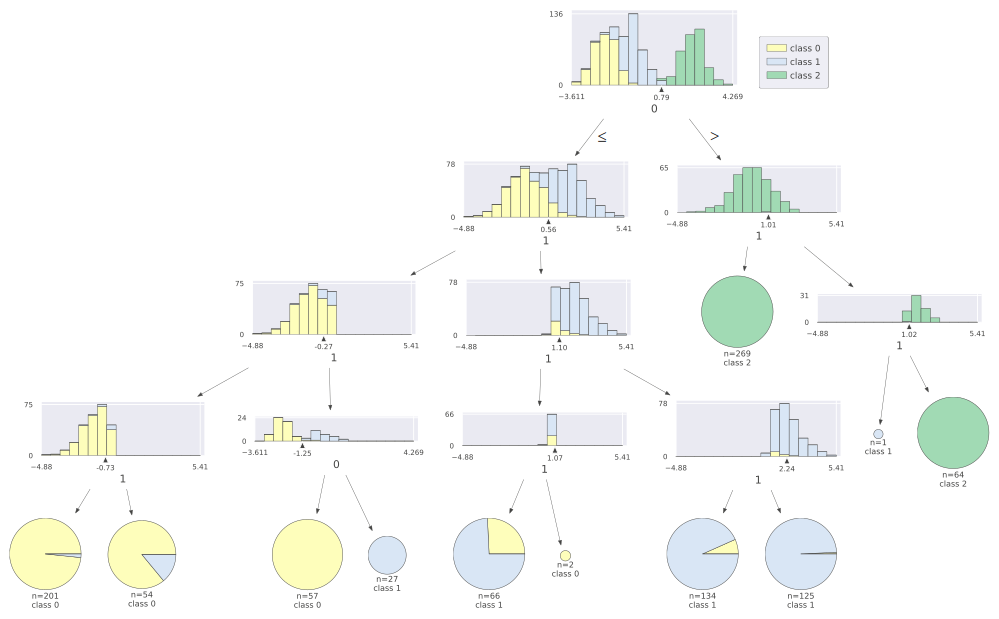

In [ ]:
viz = dtreeviz(rfc.estimators_[20], X, y, feature_names=[f'{i}' for i in np.arange(len(X[0]))])
viz.scale=1.2
display(viz)

For a forest we can also evaluate the feature importance:

Explicetly evaluated feature importance: [0.68304249 0.31695751]
Importance saved in the model object: [0.68304249 0.31695751]


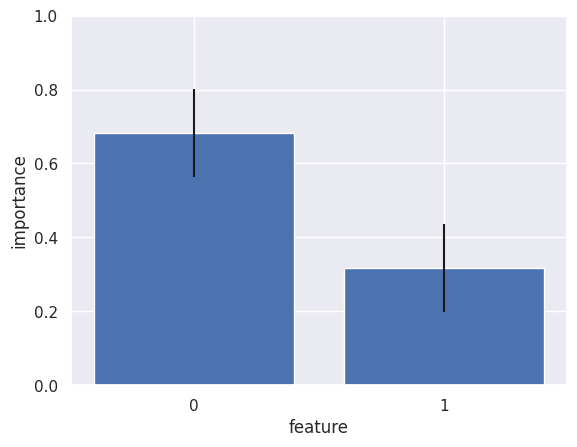

In [ ]:
importances = np.array([e.feature_importances_ for e in rfc.estimators_])

#plt.plot(importances.T, '.')
plt.bar(['0', '1'], importances.mean(axis=0), yerr=importances.std(axis=0))
plt.xlabel('feature')
plt.ylabel('importance')
plt.ylim(0, 1)

print('Explicetly evaluated feature importance:', importances.mean(axis=0))
print('Importance saved in the model object:', rfc.feature_importances_)

Alternatively we can use permutation to study feature importance.
It evaluates decrease in performance (model's `.score` or specified in `scoring` parameter) for each variable when its values is shuffled between samples.
It can be time-consuming as requires re-evaluation for each feature:

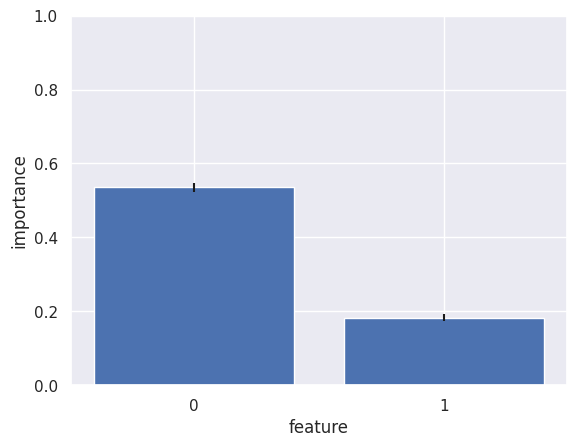

In [ ]:
p_importances = permutation_importance(rfc, X, y, n_repeats=10, n_jobs=-1)

plt.bar(['0', '1'],
        p_importances.importances_mean,
        yerr=p_importances.importances_std)
plt.xlabel('feature')
plt.ylabel('importance')
plt.ylim(0, 1);

## 3. Boosted Decision Trees

Another approach to the ensemble tree modeling is Boosted Decision Trees. In a boosting framework, the trees are created sequentially. This way each next tree reduces error of the ensemble, by adding corrections to previous predictions.

Corrections to the predictions of boosted decision trees are sequentially added, in contrast with random forest predictions:

$$ Boost(x) = Tree_0(x)+\lambda \sum_{i=1}^{N_\text{trees}} Tree_i(x)$$

Notes:

- The trees used at each step are very shallow trees (with high biased). Boosting is a way to combine `weak` classifiers (high bias, low variance) and decrease bias and increase variance gradually, in a controlled way.

- $\lambda$ is a parameters, called shrinkage or learning rate, that describes how fast we are changing the predictions at each step. A smaller learning rate is useful to control overfitting.

- Predictions and classifications are treated often on the same footing, by making the ensemble output logits.



One of the most popular implementations of boosting is XGBoost:

https://arxiv.org/abs/1603.02754

https://xgboost.readthedocs.io/en/stable/python/python_api.html

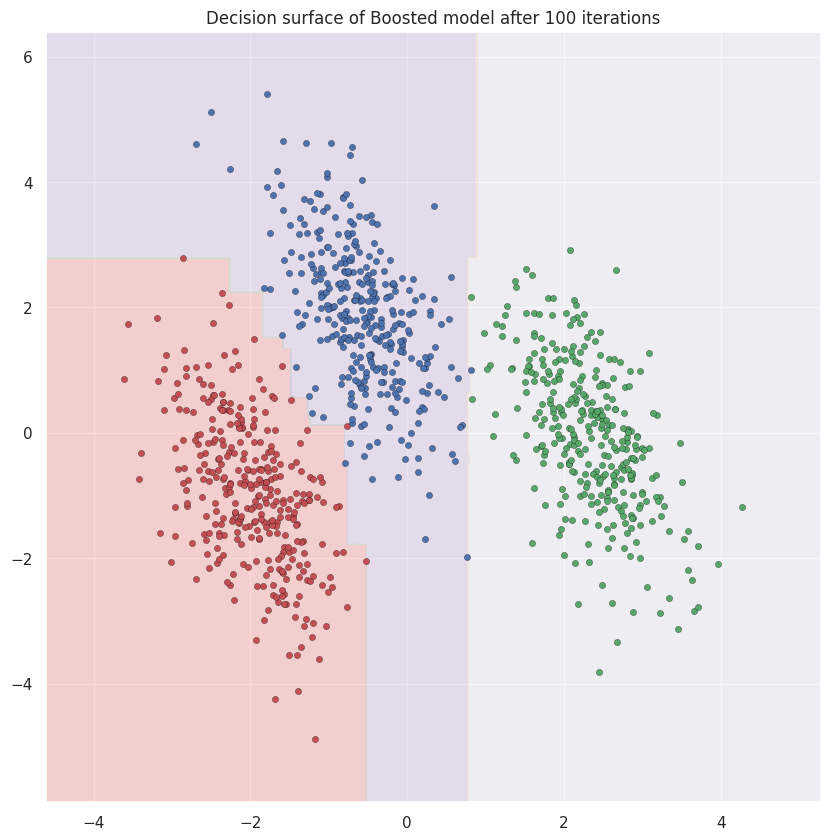

In [ ]:
from xgboost import XGBClassifier

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

params = {
    'num_class': 3,               # Number of classes in the target variable
    'max_depth': 3,               # Maximum depth of trees
    'learning_rate': 0.1,         # Learning rate
    'n_estimators': 100
}
model = XGBClassifier(**params)
model.fit(X, y, verbose=True)

# print the training scores
#print("training score : %.3f (n_est=%d)" % (dtc.score(X, y), n_est))
x_0 = X[:, 0]
x_1 = X[:, 1]
x_min = x_0.min() - 1
x_max = x_0.max() + 1
y_min = x_1.min() - 1
y_max = x_1.max() + 1
plt.figure(figsize=(10,10))
plot_prediction_2d(x_min, x_max, y_min, y_max, classifier = model)

plt.title(f'Decision surface of Boosted model after 100 iterations')
plt.axis('tight')

# Plot also the training points
colors = 'rbg'
for i, color in enumerate(colors):
    idx = np.where(y == i)
    plt.scatter(x_0[idx], x_1[idx], c=color,
                edgecolor='black', s=20, linewidth=0.2)

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()


plt.show()

## EXERCISE 4: Random forest regression


In [ ]:
X, y, (df_x, df_y) = house_prices_dataset(return_df_xy=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Predict the house prices using either a RandomForest model or boosted tree (choose one). Some suggestion lines:

- model = ensemble.RandomForestRegressor(max_depth=... n_estimators= ...)

- model = XGBRegressor(eval_metric='rmse' ,max_depth= ..., learning_rate = ..., n_estimators = ... )
model.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=True)

Use permutation importance for the feature importance.

In [ ]:
# 1. Review the examples showcasing the usage of the random forest model or xgboost.

# 2. Fit the model
n_est = 100
rfc = ensemble.RandomForestRegressor(max_depth=100, n_estimators=n_est) #how many trees should we fit?
rfc.fit(x_train, y_train)

# 3. Inspect training and test accuracy
print('train mse =', np.std(y_train - rfc.predict(x_train)))
print('test mse =', np.std(y_test - rfc.predict(x_test)))

print('train R2 =', rfc.score(x_train, y_train))
print('test R2 =', rfc.score(x_test, y_test))

print('train mad =', np.median(np.abs(y_train-rfc.predict(x_train))))
print('test mad =', np.median(np.abs(y_test-rfc.predict(x_test))))

print('train mae =', np.mean(np.abs(y_train-rfc.predict(x_train))))
print('test mae =', np.mean(np.abs(y_test-rfc.predict(x_test))))



train mse = 8802.38524415541
test mse = 23770.64381835407
train R2 = 0.9819565140900287
test R2 = 0.8765952696284418
train mad = 4070.0
test mad = 11484.0
train mae = 6018.6139730639725
test mae = 16381.233514619884


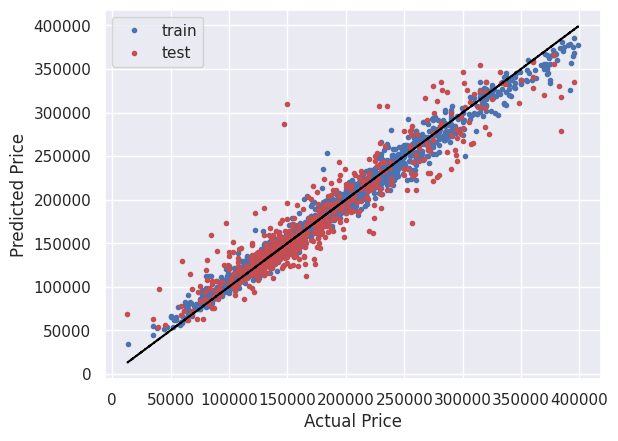

In [ ]:
# 4. Try to improve performance by adjusting hyperparameters.
# How does it compare to linear model? Can you make a plot of y_pred vs y_exact as you did for a linear model and compare visually ?
plt.plot(y_train, rfc.predict(x_train), 'b.', label='train')
plt.plot(y_test, rfc.predict(x_test), 'r.', label='test')
plt.plot(y_train,y_train,'--',color='black')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()
#much straighter line! Train much better, test slightly better


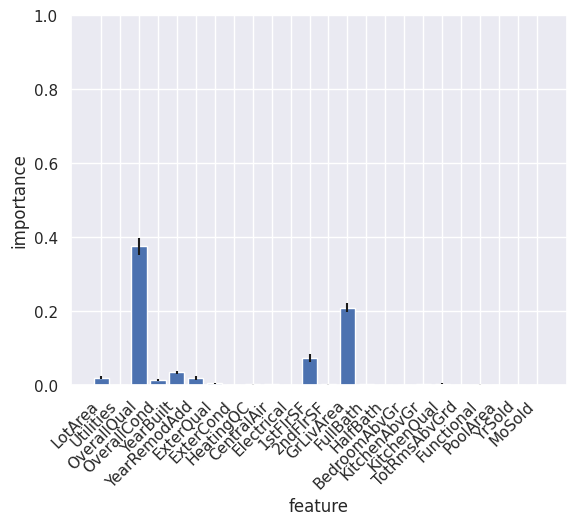

In [ ]:

# 5. Study the feature importance
p_importances = permutation_importance(rfc, x_test, y_test, n_repeats=10, n_jobs=-1)
#plt.barh(list(df_x.columns), #horizontal, taking the column names as labels directly
plt.bar(['LotArea',
                  'Utilities', 'OverallQual', 'OverallCond',
                  'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond',
                  'HeatingQC', 'CentralAir', 'Electrical',
                  '1stFlrSF', '2ndFlrSF','GrLivArea',
                  'FullBath', 'HalfBath',
                  'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
                  'Functional','PoolArea',
                  'YrSold', 'MoSold'
                  ],
        p_importances.importances_mean,
        yerr=p_importances.importances_std)
plt.xticks(rotation=45, ha="right")
plt.xlabel('feature')
plt.ylabel('importance')
plt.ylim(0, 1);

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

x, y = house_prices_dataset()

# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create an XGBoost regression model
model = XGBRegressor(eval_metric='rmse' ,max_depth= 5, learning_rate=0.3, n_estimators=100 )

# Train the XGBoost regression model
model.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=True)

y_p_train = model.predict(x_train)
y_p_test = model.predict(x_test)

[0]	validation_0-rmse:134596.41057
[1]	validation_0-rmse:97541.36816
[2]	validation_0-rmse:72056.75441
[3]	validation_0-rmse:54853.87174
[4]	validation_0-rmse:42993.08289
[5]	validation_0-rmse:35451.95244
[6]	validation_0-rmse:30629.59903
[7]	validation_0-rmse:27587.34876
[8]	validation_0-rmse:25730.68905
[9]	validation_0-rmse:24709.76727
[10]	validation_0-rmse:24208.80097
[11]	validation_0-rmse:23809.52116
[12]	validation_0-rmse:23584.79900
[13]	validation_0-rmse:23389.09845
[14]	validation_0-rmse:23321.73577
[15]	validation_0-rmse:23182.25490
[16]	validation_0-rmse:23102.05823
[17]	validation_0-rmse:22990.72707
[18]	validation_0-rmse:22983.68648
[19]	validation_0-rmse:22886.81842
[20]	validation_0-rmse:22831.25988
[21]	validation_0-rmse:22760.15836
[22]	validation_0-rmse:22803.16747
[23]	validation_0-rmse:22782.67588
[24]	validation_0-rmse:22865.65367
[25]	validation_0-rmse:22843.63312
[26]	validation_0-rmse:22813.73394


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


train mse = 15175.87
test mse = 22701.69
train mae = 11146.332
test mae = 16163.104
train R2 = 0.9467582667024774
test R2 = 0.8836751440885378


[]

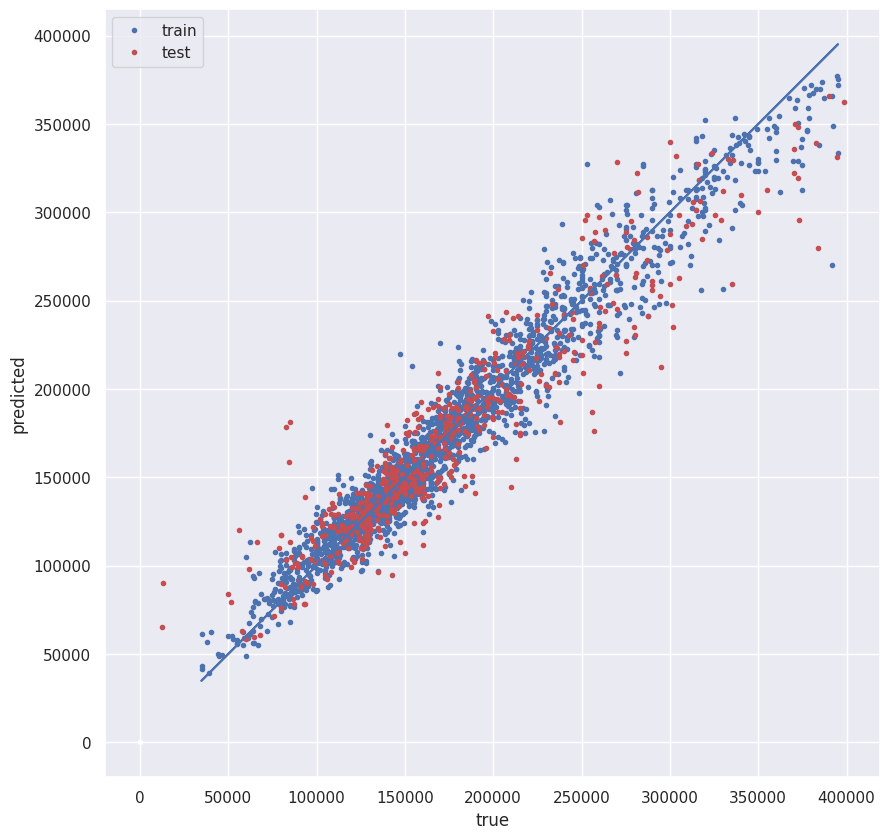

In [ ]:
from sklearn.metrics import r2_score

# mse
print('train mse =', np.std(y_train - y_p_train))
print('test mse =', np.std(y_test - y_p_test))
# mse
print('train mae =', np.mean(np.abs(y_train - y_p_train)))
print('test mae =', np.mean(np.abs(y_test - y_p_test)))
# R2
print('train R2 =', r2_score(y_train, y_p_train))
print('test R2 =', r2_score(y_test, y_p_test))

# 4. plot y vs predicted y for test and train parts
plt.figure(figsize=(10,10))
plt.plot(y_train, y_p_train, 'b.', label='train')
plt.plot(y_test, y_p_test, 'r.', label='test')

plt.plot(y_train, y_train,'-')

plt.plot([0], [0], 'w.')  # dummy to have origin
plt.xlabel('true')
plt.ylabel('predicted')
plt.gca().set_aspect('equal')
plt.legend()
plt.plot()

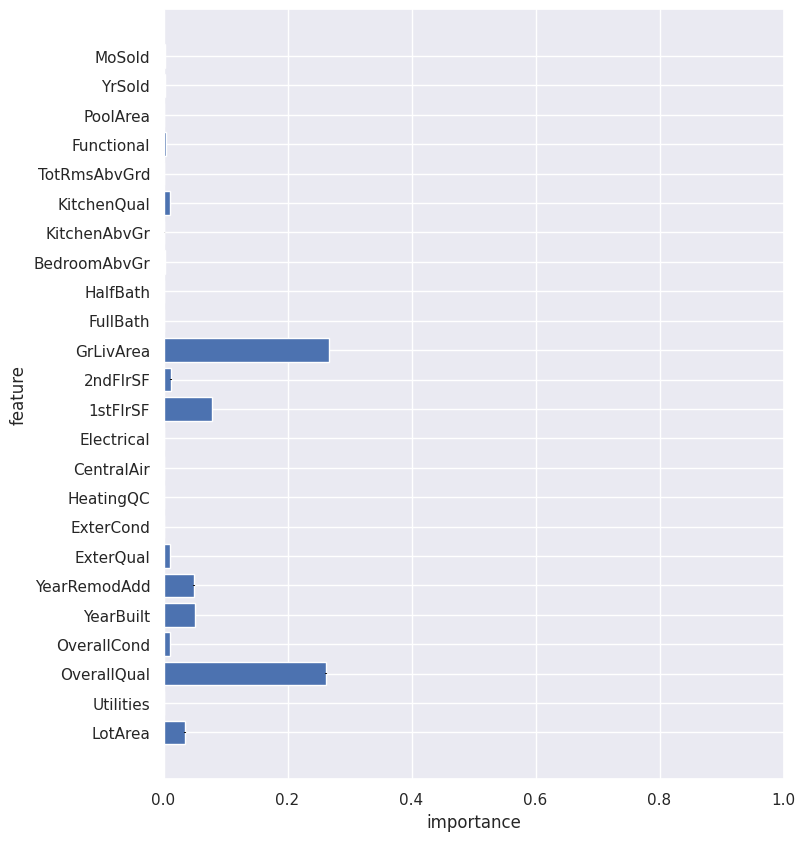

In [ ]:
p_importances = permutation_importance(model, x_test, y_test, n_repeats=10, n_jobs=-1)

plt.figure(figsize=(8, 10))
plt.barh(list(df_x.columns),
        p_importances.importances_mean,
        yerr=p_importances.importances_std, )
plt.ylabel('feature')
plt.xlabel('importance')
plt.xlim(0, 1);